In [1]:
#This is a financial analysis based on stocks bought by super investors in the second quarter

In [57]:
import yfinance as yf
import datetime
import pandas as pd
from pandas_datareader import data as pdr

In [2]:
start_date = datetime.datetime(2023,4,1)
end_date = datetime.datetime(2023, 6, 30)

In [3]:
stock_tickers = ['EWBC',
                'BUD',
                'GOOGL',
                'COF',
                'OXY',
                'DHI',
                'NVR',
                 'BRK-B',
                 'LEN-B'
                ]

In [4]:
stock_price_hist = {}

In [5]:
for stock in stock_tickers:
    ticker = yf.Ticker(stock)
    stock_data = ticker.history(start=start_date, end = end_date)
    stock_data['avg'] = (stock_data['High'] + stock_data['Low'])/2
    avg_stock_price = stock_data['avg'].mean()
    print("The average price of {} is {}".format(stock, avg_stock_price))
    stock_price_hist[stock] = avg_stock_price

print(stock_price_hist)
    

The average price of EWBC is 50.19729434484731
The average price of BUD is 60.279021906838246
The average price of GOOGL is 114.93860651235111
The average price of COF is 98.92962569226991
The average price of OXY is 59.77779443761594
The average price of DHI is 108.75956079567621
The average price of NVR is 5807.2907474705435
The average price of BRK-B is 325.94057452092403
The average price of LEN-B is 97.94254591140734
{'EWBC': 50.19729434484731, 'BUD': 60.279021906838246, 'GOOGL': 114.93860651235111, 'COF': 98.92962569226991, 'OXY': 59.77779443761594, 'DHI': 108.75956079567621, 'NVR': 5807.2907474705435, 'BRK-B': 325.94057452092403, 'LEN-B': 97.94254591140734}


In [6]:
stock_price_curr = {}

In [7]:
for stock in stock_tickers:
    ticker = yf.Ticker(stock)
    stock_current = ticker.history(period='1d')
    stock_current['avg'] = (stock_current['High'] + stock_current['Low'])/2
    avg_stock_price = stock_current['avg'].mean()
    print("The current average price of {} is {}".format(stock, avg_stock_price))
    stock_price_curr[stock] = avg_stock_price

The current average price of EWBC is 53.39500045776367
The current average price of BUD is 56.692501068115234
The current average price of GOOGL is 130.81524658203125
The current average price of COF is 98.34500122070312
The current average price of OXY is 63.07000160217285
The current average price of DHI is 109.52000045776367
The current average price of NVR is 5949.3251953125
The current average price of BRK-B is 361.5900115966797
The current average price of LEN-B is 102.9000015258789


In [8]:
for key in stock_price_hist:
    if key in stock_price_curr:
        if stock_price_curr[key] < stock_price_hist[key]:
            percentage_down = ((stock_price_curr[key] - stock_price_hist[key])/stock_price_hist[key])*100
            print("The stock {} is currently down {}".format(key, percentage_down))
        else:
            percentage_up = ((stock_price_curr[key] - stock_price_hist[key])/stock_price_hist[key])*100
            print("The stock {} is currently up {}".format(key, percentage_up))

The stock EWBC is currently up 6.370275837874129
The stock BUD is currently down -5.949865683398132
The stock GOOGL is currently up 13.813148211409764
The stock COF is currently down -0.590949846899567
The stock OXY is currently up 5.507408219941367
The stock DHI is currently up 0.699193391849092
The stock NVR is currently up 2.445795363420057
The stock BRK-B is currently up 10.937403889698032
The stock LEN-B is currently up 5.0615956205138595


In [9]:
import pandas_datareader.data as web
#Getting the consumer price index data 

start_date = datetime.datetime(2000,1,1)
current_datetime = datetime.datetime.now()
end_date = current_datetime.replace(day=1, hour=0, minute=0, second=0, microsecond=0)
print(start_date)
print(end_date)


2000-01-01 00:00:00
2023-09-01 00:00:00


In [10]:
cpi_data = web.DataReader('CPIAUCSL','fred',start_date, end_date)

In [11]:
cpi_data.rename_axis('Date',inplace=True)
cpi_data['norm_cpi_value']=(cpi_data['CPIAUCSL'] - cpi_data['CPIAUCSL'].min())/(cpi_data['CPIAUCSL'].max() - cpi_data['CPIAUCSL'].min())
cpi_data.head()

,CPIAUCSL,norm_cpi_value
Date,,
2000-01-01,169.3,0.000000
2000-02-01,170.0,0.005111
2000-03-01,171.0,0.012412
2000-04-01,170.9,0.011681
2000-05-01,171.2,0.013872


In [13]:
#getting S&P 500 index data 

symbol = "^GSPC"
sp500_data = yf.download(symbol,start= start_date, end= end_date)
sp500_data.drop(columns=['Open','High','Low','Close','Volume'],inplace= True)
sp500_data.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2000-01-03,1455.219971
2000-01-04,1399.420044
2000-01-05,1402.109985
2000-01-06,1403.449951
2000-01-07,1441.469971


In [14]:
sp500_monthly = sp500_data.resample('M').mean()
sp500_monthly.index = sp500_monthly.index.to_period('M').to_timestamp()
sp500_monthly['norm_sp500_value']=(sp500_monthly['Adj Close'] - sp500_monthly['Adj Close'].min())/(sp500_monthly['Adj Close'].max() - sp500_monthly['Adj Close'].min())
sp500_monthly.head()

,Adj Close,norm_sp500_value
Date,,
2000-01-01,1425.585504,0.170628
2000-02-01,1388.874500,0.161257
2000-03-01,1442.212599,0.174872
2000-04-01,1461.355257,0.179758
2000-05-01,1418.479548,0.168814


In [15]:
#!pip install seaborn
#!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
merged_df = pd.merge(cpi_data, sp500_monthly, on = 'Date')

/Users/kanthkr/opt/anaconda3/envs/finance/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kanthkr/opt/anaconda3/envs/finance/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kanthkr/opt/anaconda3/envs/finance/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kanthkr/opt/anaconda3/envs/finance/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

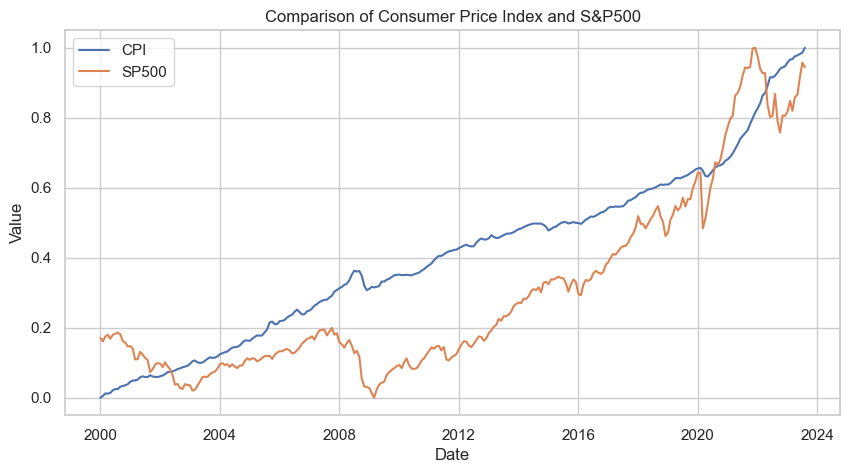

In [17]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10,5))
sns.lineplot(data=merged_df, x='Date', y = 'norm_cpi_value',label='CPI')
sns.lineplot(data=merged_df, x='Date', y = 'norm_sp500_value',label='SP500')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of Consumer Price Index and S&P500')
plt.legend()
plt.show()

In [18]:
#housing sector data

# Fetch existing home sales data from FRED
existing_home_sales = web.DataReader('EXHOSLUSM495S', 'fred', start_date, end_date)

existing_home_sales['norm_exist_home_sales']=(existing_home_sales['EXHOSLUSM495S'] - existing_home_sales['EXHOSLUSM495S'].min())/(existing_home_sales['EXHOSLUSM495S'].max() - existing_home_sales['EXHOSLUSM495S'].min())

# Print the first few rows of the data
print(existing_home_sales.head())

# Fetch new home sales data from FRED
new_home_sales = web.DataReader('HSN1F', 'fred', start_date, end_date)
new_home_sales['norm_new_home_sales'] = (new_home_sales['HSN1F'] - new_home_sales['HSN1F'].min())/(new_home_sales['HSN1F'].max() - new_home_sales['HSN1F'].min())
print(new_home_sales.head())



            EXHOSLUSM495S  norm_exist_home_sales
DATE                                            
2022-08-01      4770000.0               1.000000
2022-09-01      4680000.0               0.883117
2022-10-01      4440000.0               0.571429
2022-11-01      4120000.0               0.155844
2022-12-01      4030000.0               0.038961
            HSN1F  norm_new_home_sales
DATE                                  
2000-01-01  873.0             0.538874
2000-02-01  856.0             0.523682
2000-03-01  900.0             0.563003
2000-04-01  841.0             0.510277
2000-05-01  857.0             0.524576


In [51]:
#get housing price index information
#download data from https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx#mpo
#the above has to be done manually
df_hpi = pd.read_excel("./data01/HPI_PO_monthly_hist.xls")

#an index > 100 means increase, < 100 means decrease
df_hpi = df_hpi.iloc[2:]
df_hpi.reset_index(drop=True, inplace=True)
new_header=['Month',
    'East North Central-NSA',
            'East North Central-SA',
            'East South Central-NSA',
            'East South Central-SA',
            'Middle Atlantic-NSA',
            'Middle Atlantic-SA',
            'Mountain-NSA',
            'Mountain-SA',
            'New England-NSA',
            'New England-SA',
            'Pacific-NSA',
            'Pacific-SA',
            'South Atlantic-NSA',
            'South Atlantic-SA',
            'West North Central-NSA',
            'West North Central-SA',
            'West South Central-NSA',
            'West South Central-SA',
            'USA-NSA',
            'USA-SA']
df_hpi.columns = new_header

df_hpi = df_hpi[2:]
df_hpi.reset_index(drop=True, inplace=True)
df_hpi.dtypes

df_hpi['DATE'] = pd.to_datetime(df_hpi['Month'])

# Drop the original 'DateStrings' column (optional)
df_hpi.drop(columns=['Month'], inplace=True)

df_hpi.head()
df_hpi['norm_hpi_value_sa_usa']=(df_hpi['USA-SA'] - df_hpi['USA-SA'].min())/(df_hpi['USA-SA'].max() - df_hpi['USA-SA'].min())
df_hpi.head()

,East North Central-NSA,East North Central-SA,East South Central-NSA,East South Central-SA,Middle Atlantic-NSA,Middle Atlantic-SA,Mountain-NSA,Mountain-SA,New England-NSA,New England-SA,...,South Atlantic-NSA,South Atlantic-SA,West North Central-NSA,West North Central-SA,West South Central-NSA,West South Central-SA,USA-NSA,USA-SA,DATE,norm_hpi_value_sa_usa
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,1991-01-01,0.0
1,100.91,100.96,101,100.6,100.15,100.36,98.4,98.78,101.71,102.2,...,100.59,100.5,100.51,100.5,99.82,99.57,100.39,100.45,1991-02-01,0.001472
2,101.31,100.92,100.85,100.42,100.08,99.83,100.23,100.64,101.53,101.32,...,101.02,100.64,100.44,100.14,100.62,100.49,100.68,100.48,1991-03-01,0.00157
3,101.7,100.99,100.79,100.44,99.6,99.29,100.31,100.39,101.02,100.99,...,100.9,100.44,100.84,100.38,100.35,100.05,100.68,100.33,1991-04-01,0.001079
4,102.33,101.37,101.12,100.75,99.72,99.25,100.7,100.5,99.74,99.76,...,100.77,100.5,100.8,100.31,100.76,100.26,100.84,100.39,1991-05-01,0.001275


In [52]:
merged_homes_1 = pd.merge(existing_home_sales, new_home_sales, on = 'DATE')
merged_homes = pd.merge(merged_homes_1,df_hpi, on = 'DATE')
merged_homes.head()

,DATE,EXHOSLUSM495S,norm_exist_home_sales,HSN1F,norm_new_home_sales,East North Central-NSA,East North Central-SA,East South Central-NSA,East South Central-SA,Middle Atlantic-NSA,...,Pacific-SA,South Atlantic-NSA,South Atlantic-SA,West North Central-NSA,West North Central-SA,West South Central-NSA,West South Central-SA,USA-NSA,USA-SA,norm_hpi_value_sa_usa
0,2022-08-01,4770000.0,1.000000,638.0,0.328865,315.76,310.91,372.2,366.99,337.93,...,446.85,425.33,419.27,373.59,367.92,407.13,402.59,395.91,390.71,0.950623
1,2022-09-01,4680000.0,0.883117,567.0,0.265416,317.25,312.47,375.56,372.34,338.87,...,447.69,424.58,420.84,373.61,369.2,406.31,402.3,395.86,391.95,0.954678
2,2022-10-01,4440000.0,0.571429,577.0,0.274352,313.87,312.07,373.63,371.02,337.94,...,445.5,425.13,422.05,371.87,369.2,405.67,403.96,394.44,392.25,0.955659
3,2022-11-01,4120000.0,0.155844,582.0,0.278820,312.96,313.39,368.9,367.48,340.16,...,440.32,424,423.01,370.05,371.44,405.51,406.34,392.27,392.3,0.955822
4,2022-12-01,4030000.0,0.038961,636.0,0.327078,311.57,315.04,372.77,373.32,336.31,...,439.76,422.49,423.81,367.63,370.46,402.92,404.89,390.21,392.55,0.95664


/Users/kanthkr/opt/anaconda3/envs/finance/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kanthkr/opt/anaconda3/envs/finance/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kanthkr/opt/anaconda3/envs/finance/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kanthkr/opt/anaconda3/envs/finance/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

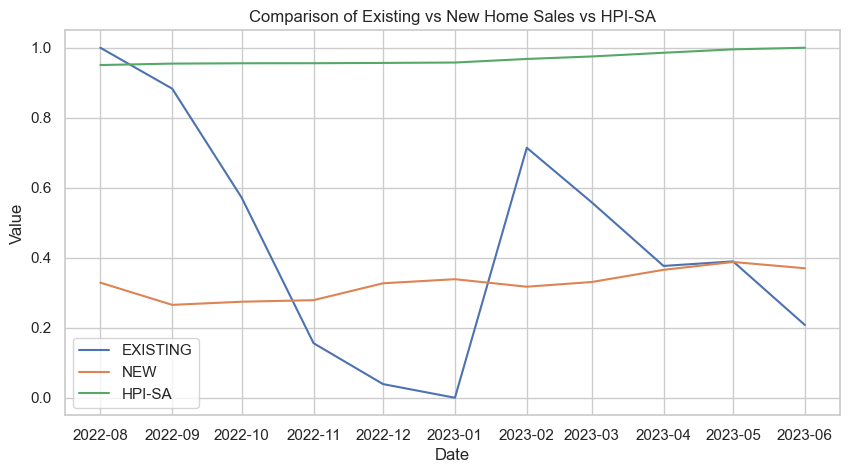

In [53]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10,5))
sns.lineplot(data=merged_homes, x='DATE', y = 'norm_exist_home_sales',label='EXISTING')
sns.lineplot(data=merged_homes, x='DATE', y = 'norm_new_home_sales',label='NEW')
sns.lineplot(data=merged_homes, x='DATE', y = 'norm_hpi_value_sa_usa',label='HPI-SA')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of Existing vs New Home Sales vs HPI-SA')
plt.legend()
plt.show()

In [62]:
ticker_symbol = 'MORTGAGE30US'

mortgage_data = pdr.get_data_fred('MORTGAGE30US',start = start_date, end=end_date)
mortgage_data = mortgage_data.resample('M').mean()
mortgage_data.index = mortgage_data.index.to_period('M').to_timestamp()
mortgage_data['norm_30yr_mortgage']=(mortgage_data['MORTGAGE30US'] - mortgage_data['MORTGAGE30US'].min())/(mortgage_data['MORTGAGE30US'].max() - mortgage_data['MORTGAGE30US'].min())
mortgage_data.head()

,MORTGAGE30US,norm_30yr_mortgage
DATE,,
2000-01-01,8.2100,0.947693
2000-02-01,8.3250,0.967416
2000-03-01,8.2400,0.952838
2000-04-01,8.1525,0.937832
2000-05-01,8.5150,1.000000


In [64]:
#index 
#just looking at house price index only
merged_hpi_30yr = pd.merge(mortgage_data, df_hpi, on = 'DATE')
merged_hpi_30yr.head()

,DATE,MORTGAGE30US,norm_30yr_mortgage,East North Central-NSA,East North Central-SA,East South Central-NSA,East South Central-SA,Middle Atlantic-NSA,Middle Atlantic-SA,Mountain-NSA,...,Pacific-SA,South Atlantic-NSA,South Atlantic-SA,West North Central-NSA,West North Central-SA,West South Central-NSA,West South Central-SA,USA-NSA,USA-SA,norm_hpi_value_sa_usa
0,2000-01-01,8.2100,0.947693,149.67,150.11,144.52,144.08,119.02,118.97,164,...,122.31,133.53,133.3,150.67,151.15,138.6,138.89,136.88,137.07,0.121219
1,2000-02-01,8.3250,0.967416,149.2,149.25,144.46,144.33,117.71,118.47,164.45,...,121.27,133.95,133.67,151.53,152.1,138.87,138.85,136.63,136.87,0.120565
2,2000-03-01,8.2400,0.952838,151.24,150.71,144.73,144.41,119.32,119.52,166.12,...,122.91,134.69,134.23,153.13,152.68,140.28,139.93,138.2,137.93,0.124031
3,2000-04-01,8.1525,0.937832,152.28,151.37,146.1,145.49,120.56,120.56,167.16,...,123.78,136.13,135.36,154.76,154,141.69,140.69,139.52,138.88,0.127138
4,2000-05-01,8.5150,1.000000,153.49,151.74,146.2,145.34,121.63,120.86,168.06,...,124.89,136.91,135.96,155.95,154.35,142.35,141.11,140.62,139.45,0.129002


/Users/kanthkr/opt/anaconda3/envs/finance/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kanthkr/opt/anaconda3/envs/finance/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kanthkr/opt/anaconda3/envs/finance/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kanthkr/opt/anaconda3/envs/finance/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

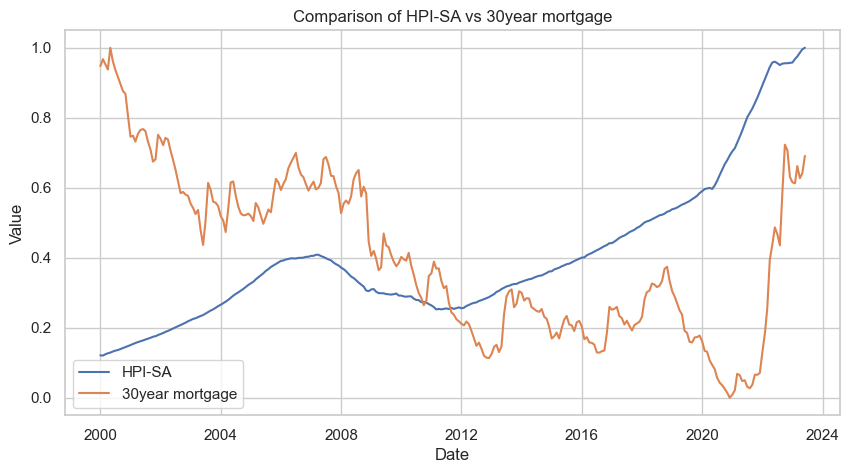

In [66]:


sns.set(style = 'whitegrid')
plt.figure(figsize = (10,5))
sns.lineplot(data=merged_hpi_30yr, x='DATE', y = 'norm_hpi_value_sa_usa',label='HPI-SA')
sns.lineplot(data=merged_hpi_30yr, x='DATE', y = 'norm_30yr_mortgage',label='30year mortgage')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of HPI-SA vs 30year mortgage')
plt.legend()
plt.show()